In [1]:
import numpy as np
import pandas as pd
import glob

from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

import math

# Language

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


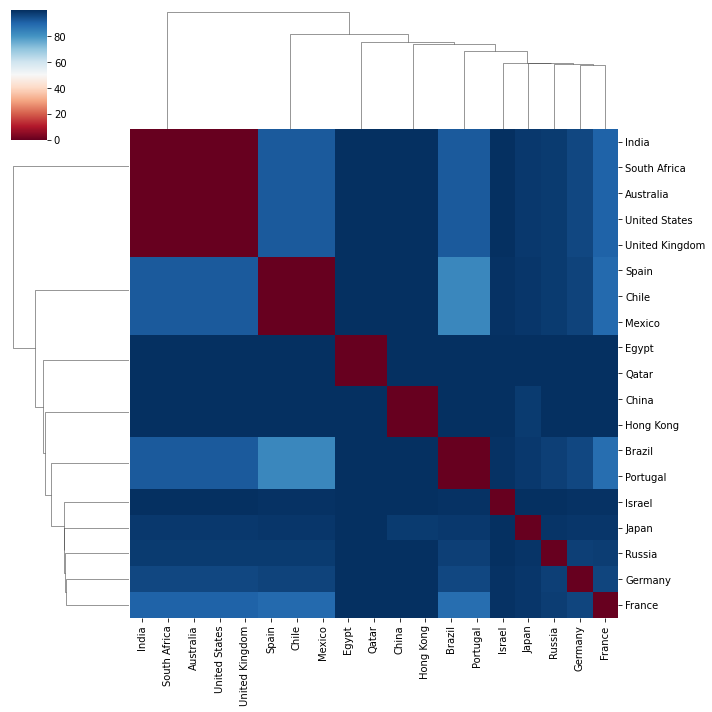

In [56]:
Lexical = pd.read_csv(
    'input_data/Language/lexical_similarity.csv', index_col=0)

Lexical_nations = ['English', 'English', 'German', 'French', 'English', 
                   'English', 'English', 'Spanish', 'Spanish','Spanish', 
                   'Portuguese', 'Portuguese', 'Standard Arabic', 'Standard Arabic',
                   'Russian', 'Hebrew','Japanese', 'Mandarin Chinese', 'Mandarin Chinese'] 
                   #'Yue Chinese'


region_list = ['United States', 'United Kingdom', 'Germany', 'France', 'Australia',
               'South Africa', 'India', 'Chile','Mexico', 'Spain',
               'Brazil', 'Portugal', 'Egypt', 'Qatar',
               'Russia', 'Israel', 'Japan', 'China', 'Hong Kong']


Lexical_dist = pd.DataFrame(columns=(region_list), index=(region_list))

for i in range(len(region_list)):
    for j in range(len(region_list)):
        if Lexical_nations[i] == Lexical_nations[j]:
            Lexical_dist.iloc[i, j] = 100 # regions speaking the same language have no distance from each other
        else:
            # Asymmetric structure
            value1 = Lexical.loc[(Lexical['LangName_1'] == Lexical_nations[i]) & (
                Lexical['LangName_2'] == Lexical_nations[j]), 'Similarity']
            value2 = Lexical.loc[(Lexical['LangName_1'] == Lexical_nations[j]) & (
                Lexical['LangName_2'] == Lexical_nations[i]), 'Similarity']
            if value1.empty & value2.empty:
                Lexical_dist.iloc[i, j] = np.nan
            elif value1.empty:
                Lexical_dist.iloc[i, j] = float(value2)
            elif value2.empty:
                Lexical_dist.iloc[i, j] = float(value1)

# Lexical_dist[['Hong Kong'] == 0, i] = Lexical_dist[['China']]
# repalce HK's nan with China's results 
# for i in range(len(region_list)-1):
#     if np.isnan(Lexical_dist.loc['Hong Kong', region_list[i]]):
#         Lexical_dist.loc['Hong Kong', region_list[i]] = Lexical_dist.loc['China', region_list[i]]

# for i in range(len(region_list)-1):
#     if np.isnan(Lexical_dist.loc[region_list[i], 'Hong Kong']):
#         Lexical_dist.loc[region_list[i], 'Hong Kong'] = Lexical_dist.loc[ region_list[i],'China']

Lexical_dist = 100 - Lexical_dist
Lexical_dist.to_csv('rdm/Lexical_dist.csv')
Lexical_dist = Lexical_dist.apply(pd.to_numeric)

sns.clustermap(Lexical_dist,cmap="RdBu",
            xticklabels=Lexical_dist.index,
            yticklabels=Lexical_dist.index)

# Personality

## Personality ALL

In [57]:
personality_all = pd.read_csv('input_data/Personality/Nations/Personality_country_data.csv',index_col=0)
#rdm
personality_all_dist = pd.DataFrame(euclidean_distances(personality_all.iloc[:,30:35]),
                          index = personality_all.index,
                          columns = personality_all.index)
personality_all_dist.to_csv('rdm/personality_all_dist.csv')
personality_all_dist

,Australia,Brazil,Chile,China,Egypt,France,Germany,Hong Kong,India,Israel,Japan,Mexico,Portugal,Qatar,Russia,South Africa,Spain,United Kingdom,United States
Australia,0.000000,31.951884,13.440648,24.264182,14.365278,14.823131,16.182858,17.447009,15.223240,13.414414,14.897610,14.733960,11.481401,9.780905,17.692668,5.989863,15.081791,10.506153,6.996540
Brazil,31.951884,0.000000,23.065012,16.355961,29.204863,25.033191,27.104147,33.998683,21.302457,23.823249,35.570375,24.225204,33.955801,31.892817,33.289968,29.455498,21.462903,41.811325,29.537438
Chile,13.440648,23.065012,0.000000,18.259857,16.014008,4.748654,8.745636,19.716077,13.670245,5.559918,17.634476,11.716432,11.250638,13.722998,15.791130,10.612535,3.013147,21.878549,14.630903
China,24.264182,16.355961,18.259857,0.000000,22.199711,21.756669,22.194120,19.213007,16.346520,15.056781,22.590149,19.992462,25.964915,20.680515,24.399141,21.482589,18.889409,32.036782,20.167698
Egypt,14.365278,29.204863,16.014008,22.199711,0.000000,18.989112,21.773261,19.261859,9.816646,14.665390,21.091027,15.703746,18.350730,17.651580,22.297881,9.458908,17.607284,21.447187,10.304397
France,14.823131,25.033191,4.748654,21.756669,18.989112,0.000000,5.685354,22.628957,17.582405,9.469047,19.194593,11.424379,11.863331,16.384222,14.563477,12.851717,4.838929,22.333907,17.456441
Germany,16.182858,27.104147,8.745636,22.194120,21.773261,5.685354,0.000000,21.579846,21.093220,11.040380,17.143435,11.365420,13.088534,16.719586,10.205393,14.787956,9.638364,21.890852,18.839552
Hong Kong,17.447009,33.998683,19.716077,19.213007,19.261859,22.628957,21.579846,0.000000,20.744089,14.620713,7.598931,21.633101,17.705827,10.692210,17.717237,15.708959,22.450276,18.802165,14.257847
India,15.223240,21.302457,13.670245,16.346520,9.816646,17.582405,21.093220,20.744089,0.000000,12.953363,22.880167,15.781406,20.031152,17.252181,24.720252,12.016242,14.119443,24.880918,11.233624
Israel,13.414414,23.823249,5.559918,15.056781,14.665390,9.469047,11.040380,14.620713,12.953363,0.000000,13.831802,12.831827,11.365711,10.749443,14.680832,9.814020,8.171590,20.945723,12.628224


## Extraversion

In [58]:
Extraversion = personality_all.iloc[:,0:6]
#rdm
Extraversion_dist = pd.DataFrame(euclidean_distances(Extraversion),
                          index = Extraversion.index,
                          columns = Extraversion.index)
Extraversion_dist.to_csv('rdm/Extraversion_dist.csv')
#Extraversion_dist

## Conscientiousness

In [59]:
Conscientiousness = personality_all.iloc[:,12:18]
#rdm
Conscientiousness_dist = pd.DataFrame(euclidean_distances(Conscientiousness),
                          index = Conscientiousness.index,
                          columns = Conscientiousness.index)
Conscientiousness_dist.to_csv('rdm/Conscientiousness_dist.csv')
#Conscientiousness_dist

## Openness

In [60]:
Openness = personality_all.iloc[:,24:30]
#rdm
Openness_dist = pd.DataFrame(euclidean_distances(Openness),
                          index = Openness.index,
                          columns = Openness.index)
Openness_dist.to_csv('rdm/Openness_dist.csv')
#Openness_dist

## Neuroticism

In [61]:
Neuroticism = personality_all.iloc[:,18:24]
#rdm
Neuroticism_dist = pd.DataFrame(euclidean_distances(Neuroticism),
                          index = Neuroticism.index,
                          columns = Neuroticism.index)
Neuroticism_dist.to_csv('rdm/Neuroticism_dist.csv')
#Neuroticism_dist

## Agreeableness

In [62]:
Agreeableness = personality_all.iloc[:,6:12]
#rdm
Agreeableness_dist = pd.DataFrame(euclidean_distances(Agreeableness),
                          index = Agreeableness.index,
                          columns = Agreeableness.index)
Agreeableness_dist.to_csv('rdm/Agreeableness_dist.csv')
#Agreeableness_dist

# Socioecological

## Climates

In [63]:
Climatic_demands = pd.read_csv('input_data/climates/Climatic_demand.csv',index_col=0)
Climatic_demands_dist = pd.DataFrame(euclidean_distances(Climatic_demands),
                          index = Climatic_demands.index,
                          columns = Climatic_demands.index)
Climatic_demands_dist.to_csv('rdm/Climatic_demands_dist.csv')
# Climatic_demands_dist

## Coordinate(Geography)

In [64]:
Coordinate = pd.read_csv('input_data/coordinate/geographic_coordinate.csv',index_col=0)
#rdm
Coordinate_dist = pd.DataFrame(euclidean_distances(Coordinate),
                          index = Coordinate.index,
                          columns = Coordinate.index)
Coordinate_dist.to_csv('rdm/Coordinate_dist.csv')
#Coordinate_dist

## subsistence style

In [65]:
MiBro = pd.read_csv('input_data/subsistence/MiBro.csv', index_col=1)

region_list = ['UK', 'USA', 'Germany', 'France', 'Australia', 'South Africa', 'India', 'Chile',
               'Mexico', 'Spain', 'Brazil', 'Portugal', 'Egypt', 'Qatar', 'Russia', 'Israel', 'Japan', 'China', 'Hong Kong']

subsistence = MiBro.loc[region_list,'InterdependentSubsistenceStyleComposite1990']

subsistence_dist = pd.DataFrame(euclidean_distances(pd.DataFrame(subsistence)),
                          index = subsistence.index,
                          columns = subsistence.index)
subsistence_dist.to_csv('rdm/subsistence_dist.csv')

## disease

In [66]:
disease = MiBro.loc[region_list,'HistoricalDiseasePrevalence7Items']

disease_dist = pd.DataFrame(euclidean_distances(pd.DataFrame(disease)),
                          index = disease.index,
                          columns = disease.index)
disease_dist.to_csv('rdm/disease_dist.csv')

# Modernization 

In [2]:
edu_file = glob.glob('input_data/Modernization/Education/*.csv')
edu = pd.read_csv(edu_file[0],header=2, index_col=0)

urban_file = glob.glob('input_data/Modernization/Urban_population/*.csv')
urban = pd.read_csv(urban_file[0],header=2, index_col=0)

wealth_file = glob.glob('input_data/Modernization/Wealth/*.csv')
wealth = pd.read_csv(wealth_file[0],header=2, index_col=0)

# match the label of data downloaded
region_list = ['United States','United Kingdom','Germany','France',
               'Australia','South Africa','India','Chile','Mexico',
               'Spain','Brazil','Portugal','Egypt, Arab Rep.',
               'Qatar','Russian Federation','Israel','Japan','China',
               'Hong Kong SAR, China']

## Education

In [4]:
edu_region = edu.loc[region_list,'2018']
edu_region_2018 = pd.DataFrame(edu_region)
edu_region_2018.columns = ['Edu_2018']

edu_dist = pd.DataFrame(euclidean_distances(edu_region_2018),
                          index=edu_region_2018.index,
                          columns=edu_region_2018.index)
edu_dist.to_csv('rdm/edu_rdm.csv')

## Urban_population

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


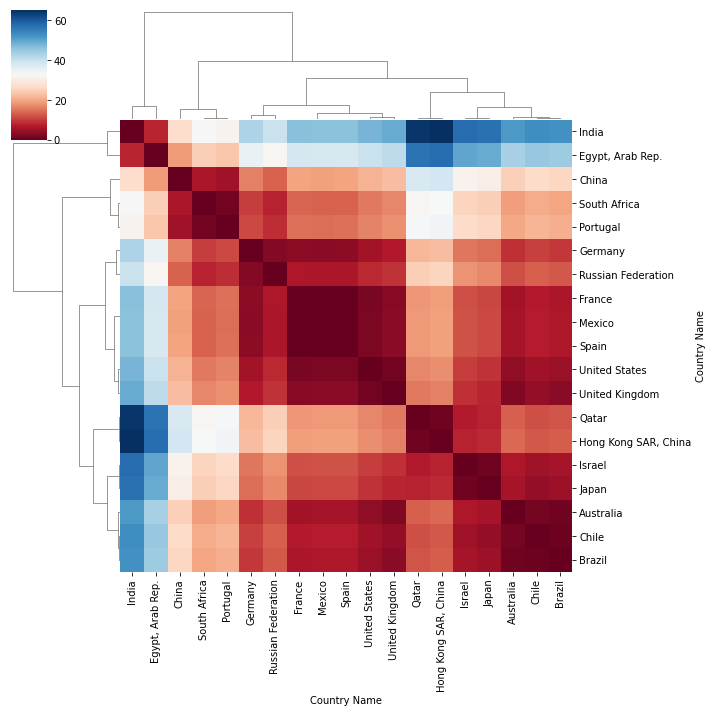

In [5]:
urban_region_2020 = urban.loc[region_list,'2020']
urban_region_2020 = pd.DataFrame(urban_region_2020)
urban_region_2020.columns = ['Urban_2020']
urban_dist = pd.DataFrame(euclidean_distances(urban_region_2020),
                          index=urban_region_2020.index,
                          columns=urban_region_2020.index)
urban_dist.to_csv('rdm/urban_rdm.csv')

sns.clustermap(urban_dist,cmap="RdBu",method='ward',
               xticklabels=urban_dist.index,
               yticklabels=urban_dist.index)

## Wealth

In [6]:
wealth_region_2015 = wealth.loc[region_list,'2015']
wealth_region_2015 = pd.DataFrame(wealth_region_2015)
wealth_region_2015.columns = ['Wealth_2015']
wealth_dist = pd.DataFrame(euclidean_distances(wealth_region_2015),
                          index=wealth_region_2015.index,
                          columns=wealth_region_2015.index)
wealth_dist.to_csv('rdm/wealth_rdm.csv')

## __High technology__

In [88]:
hightec_file = glob.glob('input_data/Modernization/Science_and_Technology/all/*.csv')
hightec = pd.read_csv(hightec_file[1],header=4, index_col=0)

hightec_region = hightec.loc[region_list,]
# Research and development expenditure (% of GDP) in Qatar(2017) is missing, and thus is filled by mean
RDEG_Qatar = hightec_region.loc['Qatar',].iloc[4,3:]
hightec_region.loc[(hightec_region['Country Code']=='QAT')&
(hightec_region['Indicator Name']=='Research and development expenditure (% of GDP)'),
                '2017'] = RDEG_Qatar.mean()

hightec_region = hightec_region[['Indicator Name','2017']]
hightec_region = hightec_region.pivot(columns='Indicator Name',values='2017')
hightec_region_scaled = pd.DataFrame(preprocessing.scale(hightec_region),
                                index = hightec_region.index,columns = hightec_region.columns)
hightec_dist = pd.DataFrame(euclidean_distances(hightec_region_scaled),
                          index=hightec_region_scaled.index,
                          columns=hightec_region_scaled.index)
hightec_dist.to_csv('rdm/hightec_rdm.csv')

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [91]:
hightec_region

Indicator Name,High-technology exports (% of manufactured exports),High-technology exports (current US$),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP)
Country Name,,,,,
Australia,17.701982,4.900488e+09,26403.0,2503.0,1.879260
Brazil,14.311719,1.071507e+10,20178.0,5480.0,1.117500
Chile,6.972118,6.342116e+08,2469.0,425.0,0.355930
China,30.907239,6.541570e+11,135885.0,1245709.0,2.116030
"Egypt, Arab Rep.",0.565233,7.384575e+07,1254.0,1025.0,0.679410
France,25.997005,1.087800e+11,1832.0,14415.0,2.198880
Germany,15.807912,1.952450e+11,19927.0,47785.0,3.047100
"Hong Kong SAR, China",61.554030,2.936080e+11,12975.0,324.0,0.835260
India,7.360673,1.510176e+10,31621.0,14961.0,0.666030


## All

In [7]:
rsa_results = pd.DataFrame(index=['edu_2018','urban_2020', 'wealth_2015'], 
                           columns=['edu_2018','urban_2020', 'wealth_2015'])
rdm_list = [edu_region_2018, urban_region_2020, wealth_region_2015]

for i in range(len(rdm_list)):
    for j in range(len(rdm_list)):
        rsa_results.iloc[i,j] = spearmanr(rdm_list[i], rdm_list[j])[0]
        
rsa_results

,edu_2018,urban_2020,wealth_2015
edu_2018,1.0,0.27193,0.607018
urban_2020,0.27193,1.0,0.596491
wealth_2015,0.607018,0.596491,1.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


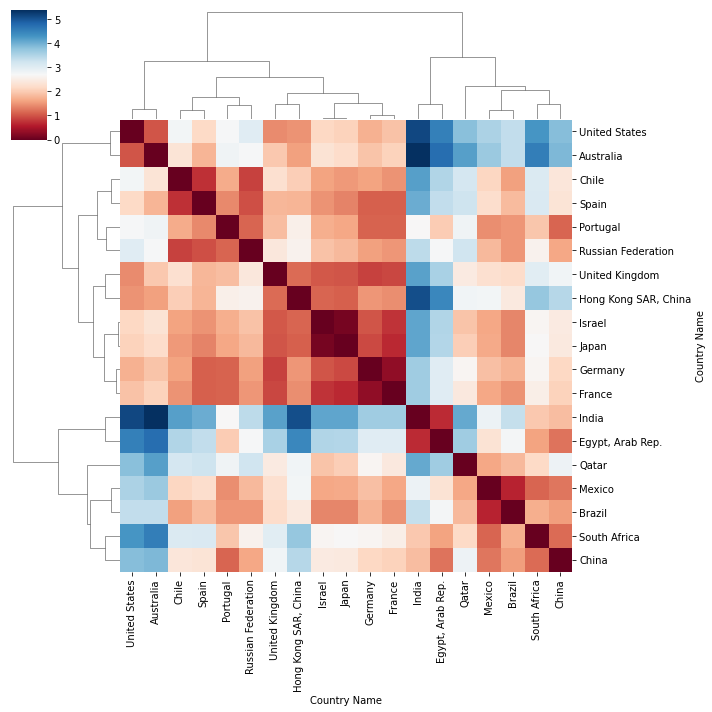

In [8]:
modern = pd.concat([edu_region_2018,urban_region_2020,wealth_region_2015],axis=1)
modern_scaled = preprocessing.scale(modern)
modern_scaled = pd.DataFrame(modern_scaled,
                             index=modern.index,columns=modern.columns)

modern_dist = pd.DataFrame(euclidean_distances(modern_scaled),
                           index=modern_scaled.index,
                           columns=modern_scaled.index)

modern_dist.to_csv('rdm/modern_dist.csv')
sns.clustermap(modern_dist,cmap="RdBu",method='ward',
               xticklabels=modern_scaled.index,
               yticklabels=modern_scaled.index)

In [10]:
modern.sort_values(by = 'Urban_2020')

,Edu_2018,Urban_2020,Wealth_2015
Country Name,,,
India,28.060551,34.926,947.424118
"Egypt, Arab Rep.",38.904949,42.783,2936.915520
China,50.604439,61.428,3047.126536
Portugal,65.662659,66.310,12614.267664
South Africa,23.801960,67.354,3426.915436
Russian Federation,84.584251,74.754,5976.750823
Germany,70.342644,77.453,21763.660449
Mexico,41.522800,80.731,6290.437671
Spain,91.112572,80.810,15049.048296


# Cultural value

## Hofstede’s cultural dimensions-6-D model  
Source: Hofstede’s cultural dimensions-6-D model   
1.https://geerthofstede.com/research-and-vsm/dimension-data-matrix/  
2.https://www.hofstede-insights.com/product/compare-countries/   
estimate: https://hi.hofstede-insights.com/faq   

Data: no missing

In [74]:
region_list = ['United States', 'United Kingdom', 'Germany', 'France', 'Australia',
               'South Africa', 'India', 'Chile','Mexico', 'Spain',
               'Brazil', 'Portugal', 'Egypt', 'Qatar',
               'Russia', 'Israel', 'Japan', 'China', 'Hong Kong']

In [75]:
Hofstede_6D = pd.read_csv('input_data/Value/Hofstede_6D/6-dimensions-for-website-2015-08-16.csv')
region_all = list(Hofstede_6D ['country'])
region_all = [s.replace('U.S.A.','United States') for s in region_all]
region_all = [s.replace('Great Britain','United Kingdom') for s in region_all]

#add data from https://www.hofstede-insights.com/product/compare-countries/
Hofstede_6D.index = region_all
region = region_list.copy()
region.remove('Qatar')
Hofstede_6D_select_region = pd.DataFrame(Hofstede_6D.loc[region,])

#estimate
Hofstede_6D_select_region .loc['South Africa','pdi'] = 49
Hofstede_6D_select_region .loc['Egypt','pdi'] = 80
Hofstede_6D_select_region .loc['Qatar','pdi'] = 93

Hofstede_6D_select_region .loc['South Africa','idv'] = 65
Hofstede_6D_select_region .loc['Egypt','idv'] = 37
Hofstede_6D_select_region .loc['Qatar','idv'] = 25

Hofstede_6D_select_region .loc['South Africa','mas'] = 63
Hofstede_6D_select_region .loc['Egypt','mas'] = 55
Hofstede_6D_select_region .loc['Qatar','mas'] = 55

Hofstede_6D_select_region .loc['South Africa','uai'] = 49
Hofstede_6D_select_region .loc['Egypt','uai'] = 55
Hofstede_6D_select_region .loc['Qatar','uai'] = 80

mean_ltowvs = round(Hofstede_6D_select_region.iloc[0:18,6].astype(int).mean())
Hofstede_6D_select_region .loc['Qatar','ltowvs'] = mean_ltowvs

Hofstede_6D_select_region .loc['Israel','ivr'] = np.nan # replce the nan into Nan
ivr_all = Hofstede_6D_select_region.iloc[0:18,7]
ivr_all.dropna(inplace = True)
mean_ivr = round(ivr_all.astype(int).mean())
Hofstede_6D_select_region .loc['Israel','ivr'] = mean_ivr
Hofstede_6D_select_region .loc['Qatar','ivr'] = mean_ivr

Hofstede_6D_select_region
# Paper: Examining National Culture Of Qatar but the results were different from that in Official website

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
United States,USA,U.S.A.,40,91,62,46,26,68
United Kingdom,GBR,Great Britain,35,89,66,35,51,69
Germany,GER,Germany,35,67,66,65,83,40
France,FRA,France,68,71,43,86,63,48
Australia,AUL,Australia,38,90,61,51,21,71
South Africa,SAF,South Africa,49,65,63,49,34,63
India,IND,India,77,48,56,40,51,26
Chile,CHL,Chile,63,23,28,86,31,68
Mexico,MEX,Mexico,81,30,69,82,24,97
Spain,SPA,Spain,57,51,42,86,48,44


### Power distance

In [76]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
power_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'pdi'])
#rdm
power_dist = pd.DataFrame(euclidean_distances(power_df),
                          index=power_df.index,
                          columns=power_df.index)
power_dist.to_csv('rdm/power_rdm.csv')

### Individualism

In [77]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Individualism_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'idv'])
#rdm
Individualism_dist = pd.DataFrame(euclidean_distances(Individualism_df),
                          index=Individualism_df.index,
                          columns=Individualism_df.index)
Individualism_dist.to_csv('rdm/Individualism_rdm.csv')

### Masculine

In [78]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Masculine_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'mas'])
#rdm
Masculine_dist = pd.DataFrame(euclidean_distances(Masculine_df),
                          index=Masculine_df.index,
                          columns=Masculine_df.index)
Masculine_dist.to_csv('rdm/Masculine_rdm.csv')

### Uncertainty Avoidance

In [79]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Uncertainty_Avoidance_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'uai'])
#rdm
Uncertainty_Avoidance_dist = pd.DataFrame(euclidean_distances(Uncertainty_Avoidance_df),
                          index=Uncertainty_Avoidance_df.index,
                          columns=Uncertainty_Avoidance_df.index)
Uncertainty_Avoidance_dist.to_csv('rdm/Uncertainty_Avoidance_rdm.csv')

### Long Term Orientation

In [80]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Long_Term_Orientation_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'ltowvs'])
#rdm
Long_Term_Orientation_dist = pd.DataFrame(euclidean_distances(Long_Term_Orientation_df),
                          index=Long_Term_Orientation_df.index,
                          columns=Long_Term_Orientation_df.index)
Long_Term_Orientation_dist.to_csv('rdm/Long_Term_Orientation_rdm.csv')

### Indulgence

In [81]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Indulgence_df = pd.DataFrame(Hofstede_6D_select_region.loc[:,'ivr'])
#rdm
Indulgence_dist = pd.DataFrame(euclidean_distances(Indulgence_df),
                          index=Indulgence_df.index,
                          columns=Indulgence_df.index)
Indulgence_dist.to_csv('rdm/Indulgence_rdm.csv')

### All

In [82]:
#add data from https://www.hofstede-insights.com/product/compare-countries/
Hofstede_6D_df = pd.DataFrame(Hofstede_6D_select_region.iloc[:,2:8])

#scale
Hofstede_6D_df_scaled = preprocessing.scale(Hofstede_6D_df)
Hofstede_6D_df_scaled = pd.DataFrame(Hofstede_6D_df_scaled,index = Hofstede_6D_df.index,columns = Hofstede_6D_df.columns)

Hofstede_6D_df_scaled

,pdi,idv,mas,uai,ltowvs,ivr
United States,-0.989444,1.816935,0.453496,-0.892125,-0.948591,0.949872
United Kingdom,-1.226810,1.729869,0.716593,-1.365358,0.124220,0.994434
Germany,-1.226810,0.772140,0.716593,-0.074721,1.497419,-0.297861
France,0.339809,0.946273,-0.796215,0.828725,0.639170,0.058634
Australia,-1.084390,1.773402,0.387722,-0.677018,-1.163154,1.083558
South Africa,-0.562184,0.685074,0.519271,-0.763061,-0.605292,0.727063
India,0.767069,-0.054989,0.058851,-1.150252,0.124220,-0.921728
Chile,0.102442,-1.143317,-1.782829,0.828725,-0.734029,0.949872
Mexico,0.956962,-0.838585,0.913916,0.656640,-1.034416,2.242168
Spain,-0.182397,0.075610,-0.861989,0.828725,-0.004517,-0.119614


In [83]:
#rdm
Hofstede_6D_dist = pd.DataFrame(euclidean_distances(Hofstede_6D_df_scaled),
                          index=Hofstede_6D_df_scaled.index,
                          columns=Hofstede_6D_df_scaled.index)
Hofstede_6D_dist.to_csv('rdm/Hofstede_6D_rdm.csv')

Hofstede_6D_dist

,United States,United Kingdom,Germany,France,Australia,South Africa,India,Chile,Mexico,Spain,Brazil,Portugal,Egypt,Russia,Israel,Japan,China,Hong Kong,Qatar
United States,0.000000,1.228822,3.070035,3.219217,0.354141,1.285357,3.386093,4.238374,3.889516,3.226521,3.220740,4.666724,4.276975,5.382303,2.935806,4.618229,4.939527,4.252757,4.324861
United Kingdom,1.228822,0.000000,2.477638,3.363302,1.506460,1.593329,3.363309,4.671381,4.288649,3.520081,3.490683,5.168263,4.786123,5.413047,3.187912,4.235329,4.476662,4.023365,4.537956
Germany,3.070035,2.477638,0.000000,2.540296,3.237390,2.536517,2.919584,4.362959,4.560599,2.677998,3.031681,4.310646,4.493093,3.927891,2.696843,2.586688,3.399294,3.238542,3.770615
France,3.219217,3.363302,2.540296,0.000000,3.268072,2.672374,2.656849,2.841851,3.753594,1.217039,1.819872,2.765968,3.812644,2.421687,2.938296,3.822750,3.943482,3.575901,2.554330
Australia,0.354141,1.506460,3.237390,3.268072,0.000000,1.385700,3.575126,4.134779,3.795269,3.211727,3.214047,4.580462,4.331208,5.461514,2.838017,4.721731,5.156948,4.442652,4.361531
South Africa,1.285357,1.593329,2.536517,2.672374,1.385700,0.000000,2.434586,3.418246,3.046363,2.456651,2.167062,3.880801,3.500000,4.522609,2.586641,3.852042,3.860520,3.207210,3.212509
India,3.386093,3.363309,2.919584,2.656849,3.575126,2.434586,0.000000,3.629573,3.999844,2.518491,2.279723,3.554409,2.279599,3.128662,3.734707,3.976683,2.125624,1.326027,2.331828
Chile,4.238374,4.671381,4.362959,2.841851,4.134779,3.418246,3.629573,0.000000,3.144101,2.022585,1.752871,1.765803,3.892253,3.481263,3.166940,5.291277,4.726415,4.066687,2.581531
Mexico,3.889516,4.288649,4.560599,3.753594,3.795269,3.046363,3.999844,3.144101,0.000000,3.457752,2.418055,4.006660,4.472066,4.822726,4.351307,4.334441,4.808982,4.634661,2.693022
Spain,3.226521,3.520081,2.677998,1.217039,3.211727,2.456651,2.518491,2.022585,3.457752,0.000000,1.232129,1.809073,3.216550,2.578478,2.176395,3.903979,3.860667,3.209265,2.239992


## WVS
www.culturaldistance.com

### Social relations

#### 1999-2014  
Data: Portugal is missing.

In [45]:
WVS_SR_dist = pd.read_csv('input_data/Value/WVS_Social relations/1999-2014/WVS_Social relations_18.csv')
region = list(WVS_SR_dist.columns)
region = [i.split('1999')[0] for i in region] 
region = [i.replace('Great Britain','United Kingdom') for i in region]
WVS_SR_dist.columns = region
WVS_SR_dist.index = region

#reorder
region_list_missing = [i for i in region_list if i not in ['Portugal']]
WVS_SR_dist = WVS_SR_dist.loc[region_list_missing,region_list_missing ]
WVS_SR_dist = WVS_SR_dist.fillna(0)

WVS_SR_dist.to_csv('rdm/WVS_Social relations_rdm.csv')

#### 2005-2014  
Data: Portugal and Israel are missing.

In [46]:
WVS_SR_dist_05 = pd.read_csv('input_data/Value/WVS_Social relations/2005-2014/WVS_Social relations_17.csv')
region = list(WVS_SR_dist_05.columns)
region = [i.split('2005')[0] for i in region] 
region = [i.replace('Great Britain','United Kingdom') for i in region]
WVS_SR_dist_05.columns = region
WVS_SR_dist_05.index = region

#reorder
region_list_missing = [i for i in region_list if i not in ['Portugal','Israel']]
WVS_SR_dist_05 = WVS_SR_dist_05.loc[region_list_missing,region_list_missing ]
WVS_SR_dist_05 = WVS_SR_dist_05.fillna(0)

#### correlation between two periods

In [47]:
WVS_SR_dist_drop = WVS_SR_dist.drop('Israel')
WVS_SR_dist_drop = WVS_SR_dist.drop('Israel',axis=1)

In [48]:
array_dist_99 = np.array(WVS_SR_dist_drop)[np.triu_indices(17, k = 1)] 
array_dist_05 = np.array(WVS_SR_dist_05)[np.triu_indices(17, k = 1)] 

from scipy.stats import spearmanr
spearmanr(array_dist_99, array_dist_05)[0]

0.9399646963408232

### All

In [49]:
WVS_All_dist = pd.read_csv('input_data/Value/WVS_All/WVS_All_18regions.csv')
region = list(WVS_All_dist.columns)
region = [i.split('1999')[0] for i in region] 
region = [i.replace('Great Britain','United Kingdom') for i in region]
WVS_All_dist.columns = region
WVS_All_dist.index = region

#reorder
region_list_missing = [i for i in region_list if i not in ['Portugal']]
WVS_All_dist = WVS_All_dist.loc[region_list_missing,region_list_missing ]
WVS_All_dist = WVS_All_dist.fillna(0)

WVS_All_dist.to_csv('rdm/WVS_All_rdm.csv')

# Gene

In [50]:
newgendist = pd.read_csv('input_data/2017_newgendist/2017_newgendist.csv', index_col=0)

gen_region_list = ['U.S.A', 'United Kingdom', 'Germany', 'France', 'Australia', 'South Africa', 'India', 'Chile',
               'Mexico', 'Spain', 'Brazil', 'Portugal', 'Egypt', 'Qatar', 'Russian Federation', 'Israel', 'Japan', 'China', 'Hong Kong']



region_list = ['United States', 'United Kingdom', 'Germany', 'France', 'Australia', 'South Africa', 'India', 'Chile',
               'Mexico', 'Spain', 'Brazil', 'Portugal', 'Egypt', 'Qatar', 'Russia', 'Israel', 'Japan', 'China', 'Hong Kong']

new_gendist_weighted_dist = pd.DataFrame(columns=(region_list), index=(region_list))
for i in range(len(region_list)):
    for j in range(len(region_list)):
        value1 = newgendist.loc[(newgendist['country_1'] == gen_region_list[i]) & (
            newgendist['country_2'] == gen_region_list[j]), 'new_gendist_weighted']
        value2 = newgendist.loc[(newgendist['country_1'] == gen_region_list[j]) & (
            newgendist['country_2'] == gen_region_list[i]), 'new_gendist_weighted']
        if value1.empty & value2.empty:
            new_gendist_weighted_dist.iloc[i, j] = 0
        elif value1.empty:
            new_gendist_weighted_dist.iloc[i, j] = float(value2)
        elif value2.empty:
            new_gendist_weighted_dist.iloc[i, j] = float(value1)
new_gendist_weighted_dist.to_csv('rdm/new_gendist_weighted_dist.csv')
new_gendist_weighted_dist

,United States,United Kingdom,Germany,France,Australia,South Africa,India,Chile,Mexico,Spain,Brazil,Portugal,Egypt,Qatar,Russia,Israel,Japan,China,Hong Kong
United States,0,0.01082,0.010283,0.010357,0.010914,0.044054,0.02116,0.036065,0.037483,0.010119,0.014043,0.010098,0.02035,0.020176,0.017355,0.018368,0.043396,0.040159,0.040042
United Kingdom,0.01082,0,0.001557,0.001643,0.002329,0.043711,0.016214,0.033815,0.035339,0.001321,0.006149,0.001331,0.014615,0.014825,0.010413,0.011532,0.043075,0.039683,0.039631
Germany,0.010283,0.001557,0,0.000926,0.00163,0.043918,0.01621,0.033415,0.035044,0.000598,0.005386,0.000618,0.014011,0.014503,0.009774,0.010696,0.043232,0.039725,0.03968
France,0.010357,0.001643,0.000926,0,0.001714,0.043828,0.016455,0.033521,0.035145,0.00068,0.005578,0.000701,0.014301,0.014761,0.010015,0.011106,0.043284,0.039841,0.039797
Australia,0.010914,0.002329,0.00163,0.001714,0,0.044313,0.016614,0.033725,0.035248,0.001383,0.006317,0.001396,0.014946,0.015147,0.010511,0.011786,0.042602,0.039062,0.038999
South Africa,0.044054,0.043711,0.043918,0.043828,0.044313,0,0.042786,0.067117,0.06662,0.044099,0.04276,0.043978,0.03894,0.041166,0.046892,0.044015,0.061486,0.058991,0.058959
India,0.02116,0.016214,0.01621,0.016455,0.016614,0.042786,0,0.035935,0.035923,0.016394,0.017911,0.016161,0.017788,0.010193,0.015998,0.015592,0.030104,0.027744,0.027586
Chile,0.036065,0.033815,0.033415,0.033521,0.033725,0.067117,0.035935,0,0.033115,0.033317,0.036967,0.033216,0.039951,0.037179,0.036429,0.039305,0.048919,0.047047,0.046798
Mexico,0.037483,0.035339,0.035044,0.035145,0.035248,0.06662,0.035923,0.033115,0,0.03494,0.038667,0.034829,0.041311,0.03766,0.035683,0.04096,0.046908,0.044639,0.044331
Spain,0.010119,0.001321,0.000598,0.00068,0.001383,0.044099,0.016394,0.033317,0.03494,0,0.005345,0.000363,0.014315,0.014725,0.009806,0.01102,0.043282,0.039819,0.039776


# Religion

## reldist_weighted_WCD_form

In [51]:
cultdist = pd.read_csv('input_data/2016_cultdist/2016_cultdist.csv', index_col=0)

cult_region_list = ['U.S.A', 'United Kingdom', 'Germany', 'France', 'Australia', 'South Africa',
                    'India', 'Chile','Mexico', 'Spain', 'Brazil', 'Portugal',
                    'Egypt', 'Qatar', 'Russian Federation', 'Israel',
                    'Japan', 'China', 'Hong Kong']



region_list = ['United States', 'United Kingdom', 'Germany', 'France', 'Australia', 'South Africa',
               'India', 'Chile','Mexico', 'Spain', 'Brazil', 'Portugal',
               'Egypt', 'Qatar', 'Russia', 'Israel',
               'Japan', 'China', 'Hong Kong']

In [52]:
reldist_weighted_WCD_form_dist = pd.DataFrame(columns=(region_list), index=(region_list))

for i in range(len(region_list)):
    for j in range(len(region_list)):
        value1 = cultdist.loc[(cultdist['country_1'] == cult_region_list[i]) & (
            cultdist['country_2'] == cult_region_list[j]), 'reldist_weighted_WCD_form']
        value2 = cultdist.loc[(cultdist['country_1'] == cult_region_list[j]) & (
            cultdist['country_2'] == cult_region_list[i]), 'reldist_weighted_WCD_form']
        if value1.empty & value2.empty:
            reldist_weighted_WCD_form_dist.iloc[i, j] = 0
        elif value1.empty:
            reldist_weighted_WCD_form_dist.iloc[i, j] = float(value2)
        elif value2.empty:
            reldist_weighted_WCD_form_dist.iloc[i, j] = float(value1)
            
            
reldist_weighted_WCD_form_dist.loc['Hong Kong',:] =  reldist_weighted_WCD_form_dist.loc['China',:]      

reldist_weighted_WCD_form_dist.loc[:,'Hong Kong'] =  reldist_weighted_WCD_form_dist.loc[:,'China'] 

reldist_weighted_WCD_form_dist.to_csv('rdm/reldist_weighted_WCD_form_dist.csv')
reldist_weighted_WCD_form_dist

,United States,United Kingdom,Germany,France,Australia,South Africa,India,Chile,Mexico,Spain,Brazil,Portugal,Egypt,Qatar,Russia,Israel,Japan,China,Hong Kong
United States,0,0.698041,0.698602,0.708826,0.705991,0.67856,0.956274,0.629626,0.608759,0.632584,0.617755,0.629735,0.810748,0.82387,0.774689,0.837309,0.979489,0.946157,0.946157
United Kingdom,0.698041,0,0.725977,0.739445,0.709563,0.712825,0.957279,0.684051,0.658649,0.674704,0.676448,0.672994,0.816533,0.82938,0.780257,0.846799,0.979873,0.942671,0.942671
Germany,0.698602,0.725977,0,0.706105,0.723196,0.727176,0.961532,0.662276,0.627527,0.642091,0.641185,0.64335,0.819285,0.82886,0.782698,0.851912,0.978925,0.931993,0.931993
France,0.708826,0.739445,0.706105,0,0.721969,0.749274,0.959322,0.588767,0.532521,0.544334,0.566643,0.552104,0.810598,0.813237,0.791844,0.848121,0.977354,0.933191,0.933191
Australia,0.705991,0.709563,0.723196,0.721969,0,0.730399,0.957587,0.669189,0.640769,0.656461,0.657236,0.65592,0.830003,0.839746,0.785049,0.855885,0.972356,0.933946,0.933946
South Africa,0.67856,0.712825,0.727176,0.749274,0.730399,0,0.949098,0.670874,0.659568,0.682412,0.664148,0.679139,0.81498,0.829701,0.793557,0.848976,0.984487,0.957649,0.957649
India,0.956274,0.957279,0.961532,0.959322,0.957587,0.949098,0,0.957625,0.955964,0.957678,0.956828,0.956954,0.930778,0.92127,0.964305,0.961107,0.918779,0.940688,0.940688
Chile,0.629626,0.684051,0.662276,0.588767,0.669189,0.670874,0.957625,0,0.424999,0.460242,0.4518,0.462786,0.809983,0.815576,0.767596,0.837818,0.983267,0.948574,0.948574
Mexico,0.608759,0.658649,0.627527,0.532521,0.640769,0.659568,0.955964,0.424999,0,0.345994,0.369964,0.355177,0.794732,0.799486,0.762712,0.826268,0.98627,0.96243,0.96243
Spain,0.632584,0.674704,0.642091,0.544334,0.656461,0.682412,0.957678,0.460242,0.345994,0,0.41484,0.387817,0.801094,0.804587,0.766704,0.832114,0.984382,0.954422,0.954422


## religion data archives
https://www.thearda.com/world-religion/national-profiles?REGION=6&u=117c&u=183c&u=113c&u=149c&u=186c&u=73c&u=234c&u=208c&u=181c&u=207c&u=108c&u=233c&u=90c&u=83c&u=52c&u=47c&u=31c&u=14c&u=48c

- divide Christians into four parts  
- due to the decimal point error, the sum of some regions' percentage is over 100%

In [2]:
import re

In [62]:
religion_percentage = pd.read_csv('input_data/religion/Adherence Data from the World Religion Database (2020).csv', index_col=0)
religion_percentage = religion_percentage.iloc[:,:-1]
religion_fix_list = ['Japan', 'Qatar', 'Israel', 'Mexico', 'Russia',
       'Egypt', 'United States', 'Spain', 'Portugal',
       'South Africa', 'India', 'United Kingdom', 'Germany',
       'France', 'China', 'Chile', 'Brazil', 'Australia',
       'Hong Kong']
religion_percentage.columns = religion_fix_list


region_list = ['United States', 'United Kingdom', 'Germany', 'France', 'Australia', 'South Africa',
               'India', 'Chile','Mexico', 'Spain', 'Brazil', 'Portugal',
               'Egypt', 'Qatar', 'Russia', 'Israel',
               'Japan', 'China', 'Hong Kong']
religion_percentage = religion_percentage[region_list]

for region in region_list:
    religion_df = religion_percentage[region].replace('---','0')
    number_temp = []
    for i in religion_df:
        number_temp.append(re.findall(r'\d+',i)[0])
    religion_percentage[region] = number_temp
    
religion_percentage = religion_percentage.apply(pd.to_numeric)
religion_percentage = religion_percentage / 100
religion_percentage = religion_percentage.transpose()
religion_percentage

Religion,Baha'is,Buddhists,Chinese folk-religionists,unaffiliated Christians,Christians Orthodox,Christians Catholics,Christians Protestants,Christians Independents,Daoists,Confucianists,...,Hindus,Jains,Jews,Muslims,New religionists,Shintoists,Sikhs,Spiritists,Zoroastrians,Non-Religious
United States,0.0,0.01,0.00,0.14,0.02,0.22,0.16,0.19,0.0,0.0,...,0.00,0.0,0.02,0.01,0.01,0.00,0.00,0.00,0.0,0.20
United Kingdom,0.0,0.00,0.00,0.13,0.01,0.09,0.40,0.04,0.0,0.0,...,0.01,0.0,0.00,0.06,0.00,0.00,0.01,0.00,0.0,0.23
Germany,0.0,0.00,0.00,0.05,0.03,0.29,0.30,0.01,0.0,0.0,...,0.00,0.0,0.00,0.06,0.00,0.00,0.00,0.00,0.0,0.26
France,0.0,0.01,0.00,0.03,0.01,0.59,0.01,0.01,0.0,0.0,...,0.00,0.0,0.01,0.09,0.00,0.00,0.00,0.00,0.0,0.24
Australia,0.0,0.03,0.01,0.04,0.04,0.26,0.23,0.03,0.0,0.0,...,0.02,0.0,0.00,0.03,0.01,0.00,0.01,0.00,0.0,0.32
South Africa,0.0,0.00,0.00,0.12,0.00,0.06,0.22,0.41,0.0,0.0,...,0.02,0.0,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.06
India,0.0,0.01,0.00,0.00,0.00,0.02,0.02,0.01,0.0,0.0,...,0.72,0.0,0.00,0.14,0.00,0.00,0.02,0.00,0.0,0.01
Chile,0.0,0.00,0.00,0.01,0.02,0.67,0.03,0.24,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.11
Mexico,0.0,0.00,0.00,0.01,0.00,0.90,0.04,0.06,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.03
Spain,0.0,0.00,0.00,0.00,0.02,0.84,0.00,0.01,0.0,0.0,...,0.00,0.0,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.10


In [63]:
religion_percentage_dist = pd.DataFrame(euclidean_distances(religion_percentage),
                          index=religion_percentage.index,
                          columns=religion_percentage.index)
religion_percentage_dist.to_csv('rdm/religion_percentage_rdm.csv')
religion_percentage_dist

,United States,United Kingdom,Germany,France,Australia,South Africa,India,Chile,Mexico,Spain,Brazil,Portugal,Egypt,Qatar,Russia,Israel,Japan,China,Hong Kong
United States,0.000000,0.318434,0.267955,0.460652,0.242281,0.322490,0.828191,0.497695,0.735323,0.687750,0.545069,0.690579,0.981529,0.854927,0.866660,0.821340,0.705124,0.510784,0.535817
United Kingdom,0.318434,0.000000,0.242487,0.643739,0.277669,0.453872,0.853171,0.738986,0.918967,0.870862,0.718818,0.879261,0.973242,0.865737,0.907028,0.869253,0.762496,0.561872,0.589322
Germany,0.267955,0.242487,0.000000,0.420000,0.111803,0.521536,0.862612,0.545985,0.708025,0.649307,0.522972,0.661891,0.973858,0.841606,0.892244,0.868332,0.761315,0.547266,0.566304
France,0.460652,0.643739,0.420000,0.000000,0.412189,0.732120,0.949684,0.292404,0.390512,0.294958,0.319531,0.321403,1.031891,0.872640,0.997346,0.943398,0.860233,0.695054,0.692026
Australia,0.242281,0.277669,0.111803,0.412189,0.000000,0.516043,0.840119,0.547905,0.731984,0.664605,0.556058,0.677791,0.990000,0.860349,0.873613,0.860988,0.710985,0.468615,0.518845
South Africa,0.322490,0.453872,0.521536,0.732120,0.516043,0.000000,0.851058,0.675648,0.936963,0.915751,0.731505,0.908680,1.012324,0.911098,0.927524,0.888594,0.786511,0.652917,0.659469
India,0.828191,0.853171,0.862612,0.949684,0.840119,0.851058,0.000000,1.012620,1.147693,1.101771,1.023816,1.111216,1.052188,0.954463,1.070701,1.022106,0.962133,0.893756,0.891628
Chile,0.497695,0.738986,0.545985,0.292404,0.547905,0.675648,1.012620,0.000000,0.303645,0.289655,0.200000,0.272764,1.154340,0.997296,1.055083,1.027959,0.940904,0.822922,0.788416
Mexico,0.735323,0.918967,0.708025,0.390512,0.731984,0.936963,1.147693,0.303645,0.000000,0.118743,0.233666,0.081240,1.278241,1.112924,1.205156,1.164603,1.098135,1.023132,0.960312
Spain,0.687750,0.870862,0.649307,0.294958,0.664605,0.915751,1.101771,0.289655,0.118743,0.000000,0.245561,0.053852,1.214743,1.050857,1.144246,1.113194,1.043743,0.947576,0.898833


## religion diversity
https://www.pewresearch.org/religion/2014/04/04/religious-diversity-index-scores-by-country/

In [8]:
religion_diversity = pd.read_csv('input_data/religion/religion_diversity.csv',
                                index_col=0,usecols=[0,1])

#rdm
religion_diversity_dist = pd.DataFrame(euclidean_distances(religion_diversity),
                          index=religion_diversity.index,
                          columns=religion_diversity.index)
religion_diversity_dist.to_csv('rdm/religion_diversity_rdm.csv')
religion_diversity_dist

Country,Australia,Brazil,Chile,China,Egypt,France,Germany,Hong Kong,India,Israel,Japan,Mexico,Portugal,Qatar,Russia,South Africa,Spain,United Kingdom,United States
Country,,,,,,,,,,,,,,,,,,,
Australia,0.0,3.3,3.4,1.7,4.5,0.3,0.3,1.6,1.6,1.1,0.6,4.5,4.2,0.1,0.7,2.0,1.7,0.5,1.5
Brazil,3.3,0.0,0.1,5.0,1.2,3.6,3.0,4.9,1.7,2.2,3.9,1.2,0.9,3.4,2.6,1.3,1.6,2.8,1.8
Chile,3.4,0.1,0.0,5.1,1.1,3.7,3.1,5.0,1.8,2.3,4.0,1.1,0.8,3.5,2.7,1.4,1.7,2.9,1.9
China,1.7,5.0,5.1,0.0,6.2,1.4,2.0,0.1,3.3,2.8,1.1,6.2,5.9,1.6,2.4,3.7,3.4,2.2,3.2
Egypt,4.5,1.2,1.1,6.2,0.0,4.8,4.2,6.1,2.9,3.4,5.1,0.0,0.3,4.6,3.8,2.5,2.8,4.0,3.0
France,0.3,3.6,3.7,1.4,4.8,0.0,0.6,1.3,1.9,1.4,0.3,4.8,4.5,0.2,1.0,2.3,2.0,0.8,1.8
Germany,0.3,3.0,3.1,2.0,4.2,0.6,0.0,1.9,1.3,0.8,0.9,4.2,3.9,0.4,0.4,1.7,1.4,0.2,1.2
Hong Kong,1.6,4.9,5.0,0.1,6.1,1.3,1.9,0.0,3.2,2.7,1.0,6.1,5.8,1.5,2.3,3.6,3.3,2.1,3.1
India,1.6,1.7,1.8,3.3,2.9,1.9,1.3,3.2,0.0,0.5,2.2,2.9,2.6,1.7,0.9,0.4,0.1,1.1,0.1


# Political

## political idealogy

In [3]:
political_idealogy_all = pd.read_csv('input_data/Political_idealogy/Political_idealogy.csv',
                                index_col = 0)
political_idealogy = political_idealogy_all['Mean']
political_idealogy_mean = political_idealogy.mean()
political_idealogy['Qatar'] = political_idealogy_mean # replace Qatar with mean

political_idealogy_df = pd.DataFrame(political_idealogy,index = political_idealogy.index)

regions = political_idealogy_df.index
regions = [i.replace('Hong Kong SAR','Hong Kong') for i in regions]
#rdm
political_idealogy_dist = pd.DataFrame(euclidean_distances(political_idealogy_df),
                          index=regions,
                          columns=regions)
#political_idealogy_dist.to_csv('rdm/political_idealogy_rdm.csv')
political_idealogy_dist

C:\Users\DELL\AppData\Local\Temp\ipykernel_6476\4269752685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_idealogy['Qatar'] = political_idealogy_mean # replace Qatar with mean


,Australia,Brazil,Chile,France,Germany,Hong Kong,Japan,Mexico,Portugal,Russia,Spain,United Kingdom,United States,India,South Africa,Egypt,China,Israel,Qatar
Australia,0.000000,0.100000,0.210000,0.170000,0.460000,0.290000,0.440000,0.340000,0.230000,0.650000,0.480000,0.110000,0.010000,0.390000,0.940000,0.770000,0.300000,0.320000,0.127222
Brazil,0.100000,0.000000,0.310000,0.270000,0.560000,0.190000,0.340000,0.240000,0.330000,0.550000,0.580000,0.210000,0.090000,0.290000,0.840000,0.670000,0.400000,0.220000,0.027222
Chile,0.210000,0.310000,0.000000,0.040000,0.250000,0.500000,0.650000,0.550000,0.020000,0.860000,0.270000,0.100000,0.220000,0.600000,1.150000,0.980000,0.090000,0.530000,0.337222
France,0.170000,0.270000,0.040000,0.000000,0.290000,0.460000,0.610000,0.510000,0.060000,0.820000,0.310000,0.060000,0.180000,0.560000,1.110000,0.940000,0.130000,0.490000,0.297222
Germany,0.460000,0.560000,0.250000,0.290000,0.000000,0.750000,0.900000,0.800000,0.230000,1.110000,0.020000,0.350000,0.470000,0.850000,1.400000,1.230000,0.160000,0.780000,0.587222
Hong Kong,0.290000,0.190000,0.500000,0.460000,0.750000,0.000000,0.150000,0.050000,0.520000,0.360000,0.770000,0.400000,0.280000,0.100000,0.650000,0.480000,0.590000,0.030000,0.162778
Japan,0.440000,0.340000,0.650000,0.610000,0.900000,0.150000,0.000000,0.100000,0.670000,0.210000,0.920000,0.550000,0.430000,0.050000,0.500000,0.330000,0.740000,0.120000,0.312778
Mexico,0.340000,0.240000,0.550000,0.510000,0.800000,0.050000,0.100000,0.000000,0.570000,0.310000,0.820000,0.450000,0.330000,0.050000,0.600000,0.430000,0.640000,0.020000,0.212778
Portugal,0.230000,0.330000,0.020000,0.060000,0.230000,0.520000,0.670000,0.570000,0.000000,0.880000,0.250000,0.120000,0.240000,0.620000,1.170000,1.000000,0.070000,0.550000,0.357222
Russia,0.650000,0.550000,0.860000,0.820000,1.110000,0.360000,0.210000,0.310000,0.880000,0.000000,1.130000,0.760000,0.640000,0.260000,0.290000,0.120000,0.950000,0.330000,0.522778


## political idealogy(range adjusted)

In [3]:
political_idealogy_all = pd.read_csv('input_data/Political_idealogy/Political_idealogy.csv',
                                index_col = 0)
political_idealogy = political_idealogy_all['Mean']
political_idealogy['China'] = (political_idealogy['China']/(10-0))*(10-1)+1
political_idealogy['Israel'] = (political_idealogy['Israel']/(10-0))*(10-1)+1

political_idealogy_mean = political_idealogy.mean()
political_idealogy['Qatar'] = political_idealogy_mean # replace Qatar with mean

political_idealogy_df = pd.DataFrame(political_idealogy,index = political_idealogy.index)

regions = political_idealogy_df.index
regions = [i.replace('Hong Kong SAR','Hong Kong') for i in regions]
#rdm
political_idealogy_dist = pd.DataFrame(euclidean_distances(political_idealogy_df),
                          index=regions,
                          columns=regions)
political_idealogy_dist.to_csv('rdm/political_idealogy_rdm_range.csv')
political_idealogy_dist

C:\Users\10563\AppData\Local\Temp\ipykernel_3848\344553975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_idealogy['China'] = (political_idealogy['China']/(10-0))*(10-1)+1
C:\Users\10563\AppData\Local\Temp\ipykernel_3848\344553975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_idealogy['Israel'] = (political_idealogy['Israel']/(10-0))*(10-1)+1
C:\Users\10563\AppData\Local\Temp\ipykernel_3848\344553975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Australia,Brazil,Chile,France,Germany,Hong Kong,Japan,Mexico,Portugal,Russia,Spain,United Kingdom,United States,India,South Africa,Egypt,China,Israel,Qatar
Australia,0.000000,0.100000,0.210000,0.170000,0.460000,0.290000,0.440000,0.340000,0.230000,0.650000,0.480000,0.110000,0.010000,0.390000,0.940000,0.770000,0.199000,0.757000,0.179222
Brazil,0.100000,0.000000,0.310000,0.270000,0.560000,0.190000,0.340000,0.240000,0.330000,0.550000,0.580000,0.210000,0.090000,0.290000,0.840000,0.670000,0.099000,0.657000,0.079222
Chile,0.210000,0.310000,0.000000,0.040000,0.250000,0.500000,0.650000,0.550000,0.020000,0.860000,0.270000,0.100000,0.220000,0.600000,1.150000,0.980000,0.409000,0.967000,0.389222
France,0.170000,0.270000,0.040000,0.000000,0.290000,0.460000,0.610000,0.510000,0.060000,0.820000,0.310000,0.060000,0.180000,0.560000,1.110000,0.940000,0.369000,0.927000,0.349222
Germany,0.460000,0.560000,0.250000,0.290000,0.000000,0.750000,0.900000,0.800000,0.230000,1.110000,0.020000,0.350000,0.470000,0.850000,1.400000,1.230000,0.659000,1.217000,0.639222
Hong Kong,0.290000,0.190000,0.500000,0.460000,0.750000,0.000000,0.150000,0.050000,0.520000,0.360000,0.770000,0.400000,0.280000,0.100000,0.650000,0.480000,0.091000,0.467000,0.110778
Japan,0.440000,0.340000,0.650000,0.610000,0.900000,0.150000,0.000000,0.100000,0.670000,0.210000,0.920000,0.550000,0.430000,0.050000,0.500000,0.330000,0.241000,0.317000,0.260778
Mexico,0.340000,0.240000,0.550000,0.510000,0.800000,0.050000,0.100000,0.000000,0.570000,0.310000,0.820000,0.450000,0.330000,0.050000,0.600000,0.430000,0.141000,0.417000,0.160778
Portugal,0.230000,0.330000,0.020000,0.060000,0.230000,0.520000,0.670000,0.570000,0.000000,0.880000,0.250000,0.120000,0.240000,0.620000,1.170000,1.000000,0.429000,0.987000,0.409222
Russia,0.650000,0.550000,0.860000,0.820000,1.110000,0.360000,0.210000,0.310000,0.880000,0.000000,1.130000,0.760000,0.640000,0.260000,0.290000,0.120000,0.451000,0.107000,0.470778
